# Titanic Project

#### Author: Panashe Mutamba

- 1. Introduction
    - 1.1 Background
- 2. Data Handling
    - 2.1 Data Loading
    - 2.2 Data Information
- 3. Exploratory Data Analysis
    - 3.1 Feature Analysis 
    - 3.2 Age
    - 3.3 Fare
    - 3.4 Pclass
    - 3.5 Embarked
    - 3.6 Parch
    - 3.7 SibSp
    - 3.8 Sex
- 4. Additonal Features
    - 4.1 Cabin Section
    - 4.2 Title
- 5. Data Cleaning
    - 5.1 Removal of Outliers
    - 5.2 Filling Missing values
- 6. Building Classfication Models
    - 6.1 Cross-validation
    - 6.2 Hyperparameter tTuning
    - 6.3 Ensemble Modelling
- 7. Submission

## 1. Introduction

### 1.1 Background

The Titanic is an iconic event that has been depicted in books, movies and so much more. Many people met there demise on this ship and the data we have could tell us more about the story and the survivors. What attributes led to increased survival rates? Which individuals were more likely to survive? These are the questions I aim to investigate.

I would be happy to read critiques, possible improvements or information on possible sources I could use to further my knowledge. My email is keithmutamba@gmail.com

## 2. Data Handling

### 2.1 Data Loading

In [193]:
#importing the libraries that we use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
#reading train data and test data
data=pd.read_csv('Titanic/train.csv')
datatest=pd.read_csv('Titanic/test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Data Information

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [196]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are the definitions of the column names and column entries.

- Survival: 0 = No, 1 = Yes
- pclass, Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp, no. of siblings / spouses aboard the Titanic
- parch, no. of parents / children aboard the Titanic
- ticket, Ticket number
- embarked, Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [197]:
data.shape

(891, 12)

In [198]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

numerical_cols, categorical_cols

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

Given the number of categorical columns we have clearly some transformations will be necessary for modelling. This will be done later on

In [199]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Exploratory Data Analysis

### 3.1 Feature Analysis

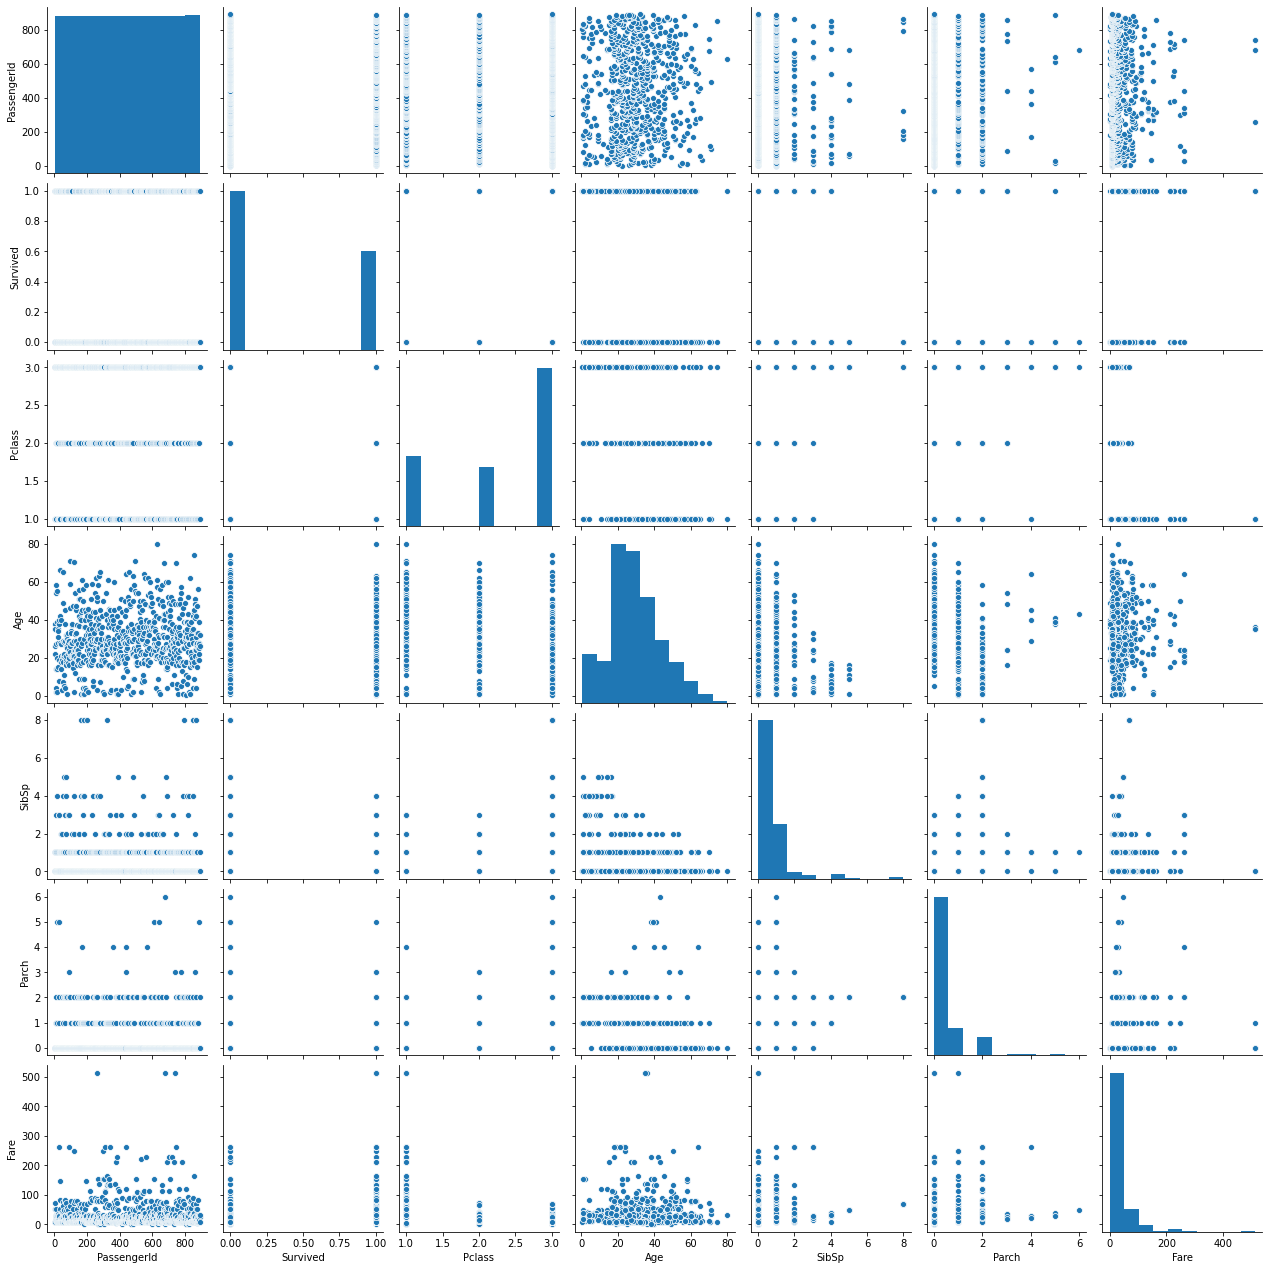

In [200]:
sns.pairplot(data)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


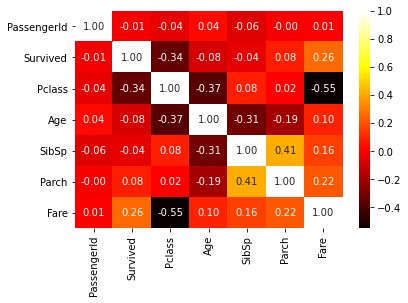

In [202]:
features = ["Pclass", "SibSp", "Parch"]
data1 = data
pd.get_dummies(data1[features])
sns.heatmap(data1.corr(),annot=True, fmt = ".2f", cmap = "hot")

### 3.2 Age

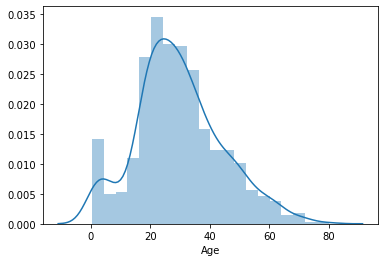

In [203]:
sns.distplot(data['Age'])

The distribution of values in age looks relatively normal.

### 3.3 Fare

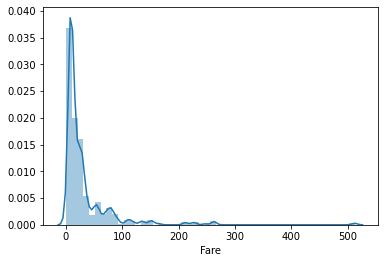

In [204]:
sns.distplot(data['Fare'])

There is  a high peak and the data is right skewed. So I chose to transfrom the data. Which will be done later on, in order to scale the data better.

### 3.4 Pclass

c:\users\keith\pycharmprojects\untitled\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


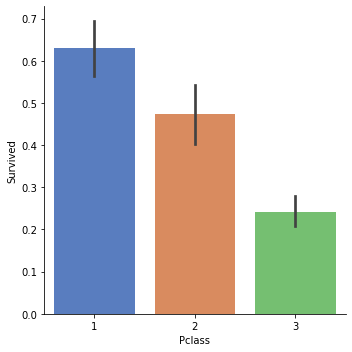

In [205]:
sns.factorplot("Pclass", "Survived",   data=data, kind="bar", palette="muted", legend=True)
                 

Upper class individuals were the most likely to survive the shipwreck. Followed by middle class individuals and lastly lower class individuals.

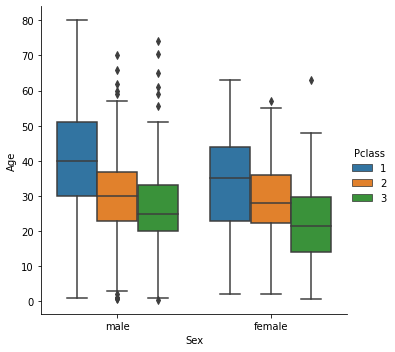

In [206]:
sns.factorplot(y="Age",x="Sex",hue="Pclass", data=data,kind="box")

With the use of boxplots we can see males of all classes are much older than females. In addition to this there are many outliers in the male boxplots compared to the female boxplots.

### 3.5 Embarked

c:\users\keith\pycharmprojects\untitled\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


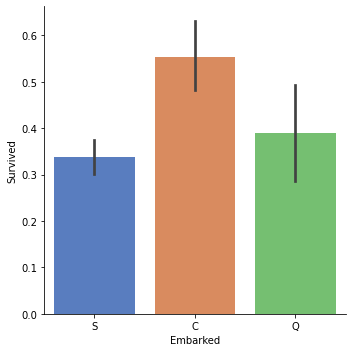

In [207]:
sns.factorplot("Embarked", "Survived", data=data, kind="bar", palette="muted")

Those who embarked from Cherbourg had a high survival rate. Perhaps people from Cherbourg are much fitter than those from Queenstown. The same could be said about Queentown compared to Southampton.

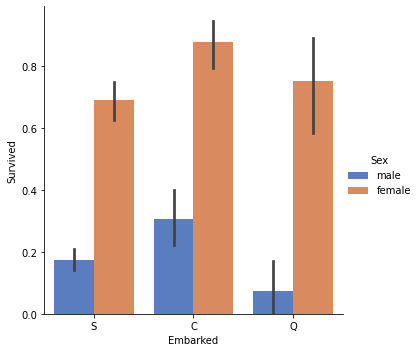

In [208]:
sns.factorplot("Embarked", "Survived", data=data, hue ='Sex', kind="bar", palette="muted")

A higher proportion of females survived for each location they embarked from as opposed to males. This can be attributed to the much higher age range in males.

### 3.6 Parch

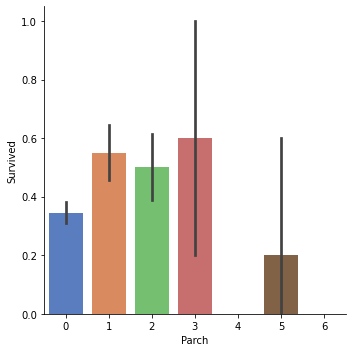

In [209]:
sns.factorplot("Parch", "Survived",   data=data, kind="bar", palette="muted",)

From 0 to 3 there is an increasing trend in survival. If you had up to 3 relatives you were more likely to survive than those who had more than 3 or less. 

### 3.7 SibSp

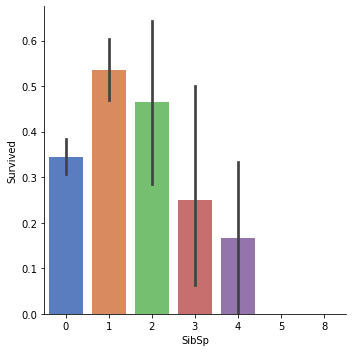

In [210]:
sns.factorplot("SibSp", "Survived",   data=data, kind="bar", palette="muted", legend=True)

Those with either 1-2 siblings or a spouse were more like to survive than those with less or more. 

### 3.8 Sex

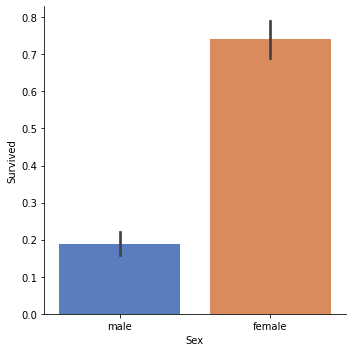

In [211]:
sns.factorplot("Sex", "Survived",  data=data, kind="bar", palette="muted")

In general females were more likely to survive than males. As we have seen the age range for males is much higher so this makes sense.

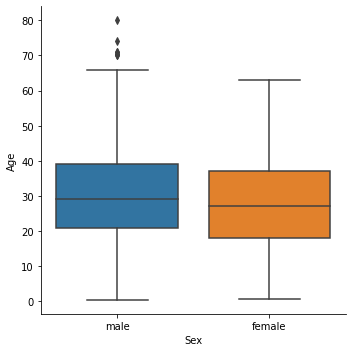

In [212]:
sns.factorplot(y="Age",x="Sex",data=data,kind="box")



## 4. Additional Features

In [213]:
#Cabin 
data['Cabin Section']= data['Cabin'].str[0]
data['Cabin Section']

#Title
data['Title3']= data['Name'].apply(lambda x: x.strip())
data['Title3']
data['Title2']= data['Title3'].apply(lambda x: x.split(',')[1])
data['Title2']
data['Title']= data['Title2'].apply(lambda x: x.split('.')[0])
data['Title']

data.drop(columns=['Title3','Title2','Cabin','Name'],inplace=True)

In the data there are columns which do not provide as much information as others. So to remedy this I devised new metrics using these columns.

### 4.1 Cabin Section

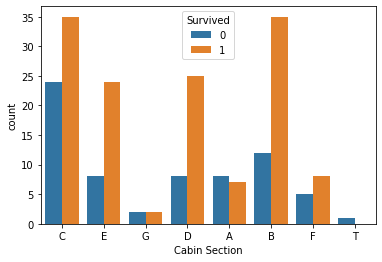

In [214]:
sns.countplot(data['Cabin Section'],hue=data['Survived'])

Cabin C and Cabin B occupants were the most likely to survive followed by Cabin D and Cabin E.

c:\users\keith\pycharmprojects\untitled\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


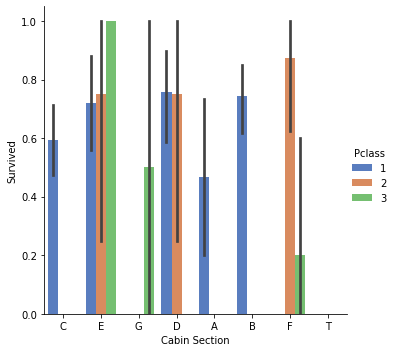

In [215]:
sns.factorplot("Cabin Section", "Survived", data=data, kind="bar",hue='Pclass' , palette="muted", legend=True)

First class occupants survival seems consistent across multiple cabins and more frequent. Where as middle class and lower class occupants are only registered in 3 cabin sections.

### 4.2 Title

[Text(0, 0, ' Mr'),
 Text(0, 0, ' Mrs'),
 Text(0, 0, ' Miss'),
 Text(0, 0, ' Master'),
 Text(0, 0, ' Don'),
 Text(0, 0, ' Rev'),
 Text(0, 0, ' Dr'),
 Text(0, 0, ' Mme'),
 Text(0, 0, ' Ms'),
 Text(0, 0, ' Major'),
 Text(0, 0, ' Lady'),
 Text(0, 0, ' Sir'),
 Text(0, 0, ' Mlle'),
 Text(0, 0, ' Col'),
 Text(0, 0, ' Capt'),
 Text(0, 0, ' the Countess'),
 Text(0, 0, ' Jonkheer')]

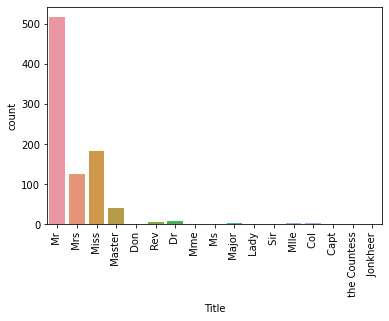

In [216]:
chart=sns.countplot(data['Title'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [217]:
Other = [' Rev', ' Dr',' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
 ' the Countess', ' Jonkheer']

for i in Other:
    data['Title'] = data['Title'].apply(lambda x:x.replace(i, 'Other'))

I decided to take a further look into the titles individuals possess.

[Text(0, 0, ' Mr'),
 Text(0, 0, ' Mrs'),
 Text(0, 0, ' Miss'),
 Text(0, 0, ' Master'),
 Text(0, 0, ' Don'),
 Text(0, 0, 'Other')]

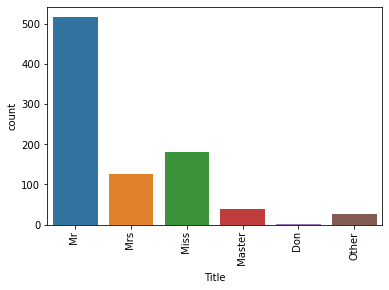

In [218]:
chart=sns.countplot(data['Title'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

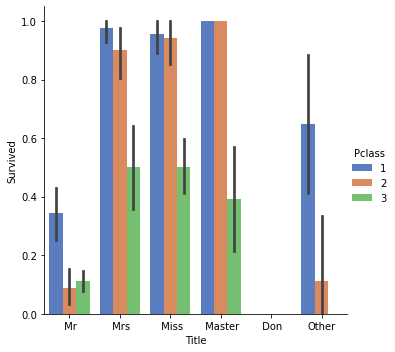

In [219]:
sns.factorplot("Title", "Survived", data=data, kind="bar",hue='Pclass' , palette="muted", legend=True)

Masters, Mrs and Miss were the most likely to survive. With upper class individuals having the highest survival rates for each section. Middle class has shown the same results. Which shows titles do have an effect on survival.

## 5. Data Cleaning

### 5.1 Removal of outliers

In [220]:
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lwb  = q1-1.5*iqr
    upb = q3+1.5*iqr
    df_out = data.loc[(data[col_name] >lwb) | (data[col_name] < upb)]
    return df_out

data2=remove_outlier(data,'Age')
data2

data3=remove_outlier(data2,'SibSp')
data3

data4=remove_outlier(data3,'Parch')
data4

data5=remove_outlier(data3,'Fare')
data5


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Section,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,NaN,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,NaN,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,382652,29.1250,Q,NaN,Mrs
886,887,0,2,male,27.0,0,0,211536,13.0000,S,NaN,Other
887,888,1,1,female,19.0,0,0,112053,30.0000,S,B,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C,C,Mr


### 5.2 Filling Missing values

In [221]:
data5['Age'].fillna(data5['Age'].mean,inplace=True)
data5['Embarked']=data5['Embarked'].fillna(data5['Embarked'].mode,inplace=True)

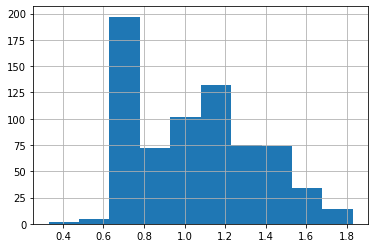

In [222]:
data5['Fare']=data5['Fare'].apply(np.log)
data5['Fare']=data5['Fare'].apply(np.log).hist()

## 6. Building a Classification Model

### 6.1. Cross validate models




In [223]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=5)

y = data5["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data5[features])
X_test = pd.get_dummies(datatest[features])
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]


for i in range(len(classifier)):
    classifier[i].fit(X,y)
    print(cross_val_score(classifier[i],X,y,cv=kfold))
    print(np.mean(cross_val_score(classifier[i],X,y,cv=kfold)))   
    

[0.76923077 0.76923077 0.7972028  0.76223776 0.8028169 ]
0.7801437998621097
[0.72027972 0.79020979 0.77622378 0.74125874 0.8028169 ]
0.7661577858760957
[0.71328671 0.76923077 0.78321678 0.76923077 0.8028169 ]
0.7675563872746972


I have used three classification models and have utilised kfold cross validation to train the models using 5 random folds of the training data. Logistic Regression has performed the best.

### 6.2. Hyperparameter tuning 

In [224]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [5, 10],
    'max_depth':[1,10],
    'max_features':[2,3],
    'max_samples':[200,400]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
g=CV_rfc.fit(X, y)
print('n_estimators:', g.best_estimator_.get_params()['n_estimators'])
print('max_depth:', g.best_estimator_.get_params()['max_depth'])
print('max_features:', g.best_estimator_.get_params()['max_features'])
print('max_samples:', g.best_estimator_.get_params()['max_samples'])
print('train_score:', CV_rfc.score(X, y))
print('test_score:', CV_rfc.score(X_test, CV_rfc.predict(X_test)))

n_estimators: 5
max_depth: 10
max_features: 2
max_samples: 200
train_score: 0.8081232492997199
test_score: 1.0


In [225]:
knn=KNeighborsClassifier()

param_grid = { 
    'n_neighbors':[1,50],
    'leaf_size':[1,30],
    'p':[1,2]
}
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
g=CV_knn.fit(X, y)
print('Best leaf_size:', g.best_estimator_.get_params()['leaf_size'])
print('Best p:', g.best_estimator_.get_params()['p'])
print('Best n_neighbors:', g.best_estimator_.get_params()['n_neighbors'])
print('train_score:', CV_knn.score(X, y))
print('test_score:', CV_knn.score(X_test, CV_knn.predict(X_test)))

Best leaf_size: 30
Best p: 2
Best n_neighbors: 50
train_score: 0.7871148459383753
test_score: 1.0


In [226]:
lr=LogisticRegression()

param_grid = { 
    'C':[1,30],
}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
g=CV_lr.fit(X, y)
print('C:', g.best_estimator_.get_params()['C'])
print('train_score:', CV_lr.score(X, y))
print('test_score:', CV_lr.score(X_test, CV_lr.predict(X_test)))

C: 1
train_score: 0.788515406162465
test_score: 1.0


Using GridSearch CV I have found the optimal parameters in the ranges I have specified for each model. Random Forest displays the least difference between the training score and testing score. The other models judging by their differences are displaying much more overfitting.

### 6.3 Ensemble Modelling

In [227]:
from sklearn.ensemble import VotingClassifier

CV_rfc.fit(X,y)
CV_knn.fit(X,y)
CV_lr.fit(X,y)

pred1=CV_rfc.predict(X_test)
pred2=CV_knn.predict(X_test)
pred3=CV_lr.predict(X_test)

models = [('lr',CV_lr),('knn',CV_knn)]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X,y)
ensemble.predict(X_test)
print('train_score:', ensemble.score(X,y))
print('test_score:', ensemble.score(X_test,ensemble.predict(X_test)))

train_score: 0.7857142857142857
test_score: 1.0


In [228]:
pred1=CV_rfc.predict(X_test)
pred2=CV_knn.predict(X_test)
pred3=CV_lr.predict(X_test)

models = [('lr',CV_lr),('rfc',CV_rfc)]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X,y)
ensemble.predict(X_test)
print('train_score:', ensemble.score(X,y))
print('test_score:', ensemble.score(X_test,ensemble.predict(X_test)))

train_score: 0.8081232492997199
test_score: 1.0


In [229]:
pred1=CV_rfc.predict(X_test)
pred2=CV_knn.predict(X_test)
pred3=CV_lr.predict(X_test)

models = [('knn',CV_knn),('rfc',CV_rfc)]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X,y)
ensemble.predict(X_test)
print('train_score:', ensemble.score(X,y))
print('test_score:', ensemble.score(X_test,ensemble.predict(X_test)))

train_score: 0.8053221288515406
test_score: 1.0


In [230]:
pred1=CV_rfc.predict(X_test)
pred2=CV_knn.predict(X_test)
pred3=CV_lr.predict(X_test)

models = [('knn',CV_knn),('rfc',CV_rfc),('lr',CV_lr)]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X,y)
ensemble.predict(X_test)
print('train_score:', ensemble.score(X,y))
print('test_score:', ensemble.score(X_test,ensemble.predict(X_test)))

train_score: 0.7913165266106442
test_score: 1.0


In [231]:
CV_rfc.fit(X,y)
CV_knn.fit(X,y)
CV_lr.fit(X,y)

pred1=CV_rfc.predict(X_test)
pred2=CV_knn.predict(X_test)
pred3=CV_lr.predict(X_test)

final_pred=(pred1+pred2+pred3)/3
print('train_score:', (CV_rfc.score(X,y)+CV_knn.score(X,y)+CV_lr.score(X,y))/3)
print('test_score:', ((CV_rfc.score(X_test,CV_rfc.predict(X_test)))+CV_knn.score(X_test,CV_knn.predict(X_test))+CV_lr.score(X_test,CV_lr.predict(X_test)))/3)


train_score: 0.7945845004668534
test_score: 1.0


Using ensemble methods I tested model combinations of my optimised trial classification models. The hard voting model with Logistic Regression and Random Forest performed the best just as the Random Forest did. Showing the best balance between underfitting and overfitting. Given the difference between the training and the testing data scores and for simplicity, I chose the Random Forest model.

## 7. Submission

In [232]:
output = pd.DataFrame({'PassengerId': datatest.PassengerId, 'Survived': CV_rfc.predict(X_test)})
output.to_csv('gender_submission.csv', index=False)